<a href="https://colab.research.google.com/github/szh141/colab/blob/main/skimage_img_registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Two parts:
I. skimage warp
II. Chas Nelson


(512, 512)
(502, 502)
(502, 502)


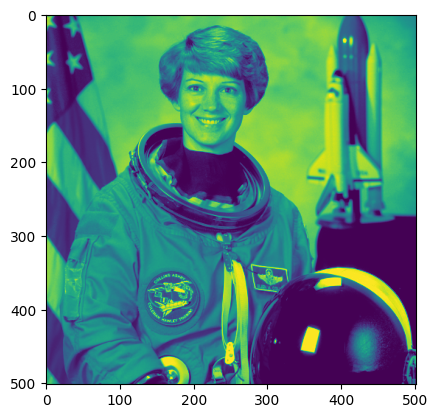

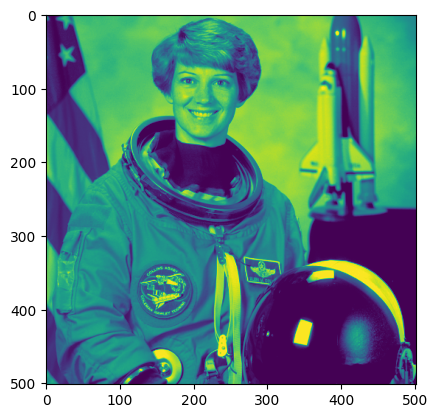

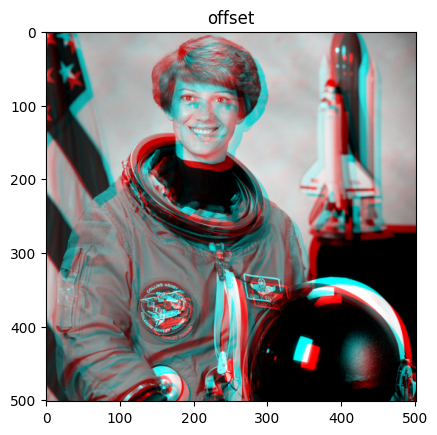

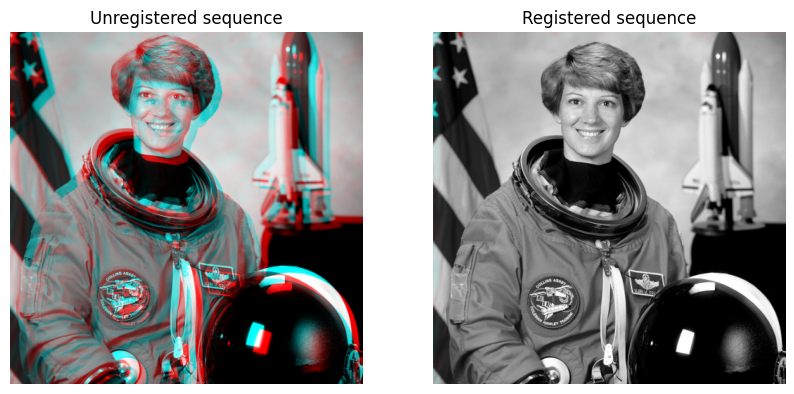

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data,filters,io,morphology,feature,color
import pandas as pd

from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

img1 = data.astronaut()
img2 =color.rgb2gray(img1)
print(img2.shape)
img_o = img2[:-10,:-10]
print(img_o.shape)
img_t = img2[10:,10:]
print(img_t.shape)
plt.imshow(img_o)
plt.show()
plt.imshow(img_t)
plt.show()

nr, nc = img_o.shape
row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij') #try w/o indexing = 'ij'

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = img_o
seq_im[..., 1] = img_t
seq_im[..., 2] = img_t

plt.imshow(seq_im)
plt.title('offset')
plt.show()


# --- Compute the optical flow
v, u = optical_flow_tvl1(img_o, img_t)

# --- Use the estimated optical flow for registration



image1_warp = warp(img_t, np.array([row_coords + v, col_coords + u]),
                   mode='edge')
#the top row and left column is blue-ish, red-ish, since no real data from image1+warp
# the data is edge reflection from img_t

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = img_o
reg_im[..., 2] = img_o

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()


Part II Chas Nelson


https://github.com/RMS-DAIM/Python-for-Bioimage-Analysis/blob/master/sessions/day02-segmentation-and-colocalization/02_colocalization/2019_IAFIG_colocalization_practicalanswers.ipynb

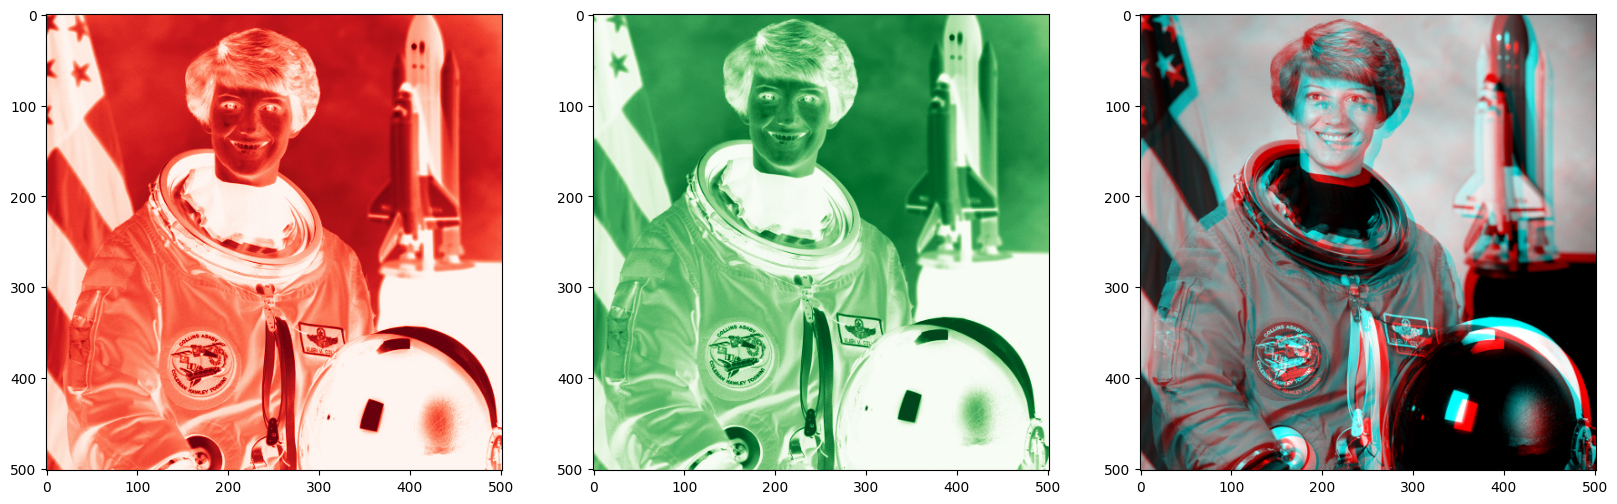

img_o is (502, 502)
img_t is (502, 502)


In [4]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
ax[0].imshow(img_o,'Reds')
ax[1].imshow(img_t,'Greens')
ax[2].imshow(seq_im)
plt.show()

print(f'img_o is {img_o.shape}')
print(f'img_t is {img_t.shape}')



In [7]:
test1 = img_o[1:,2:].flatten()
print(f'test1 is {test1.shape}')
test2 = img_t[:-1,:-2].flatten()
print(f'test2 is {test2.shape}')

test1 is (250500,)
test2 is (250500,)


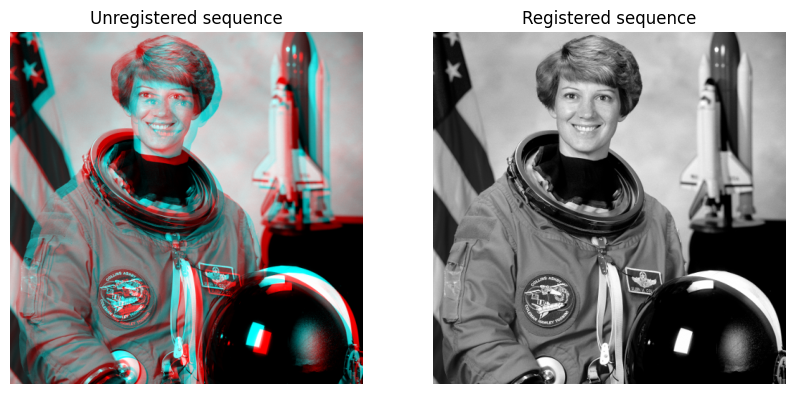

In [18]:
rho_max = 0
search_range
row_shift = 0
col_shfit = 0

for i in range(1,search_range):
  for j in range(1,search_range):
    test1 = img_o[i:,j:].flatten()
    test2 = img_t[:-i,:-j].flatten()

    a = np.dot(test1-np.average(test1),test2-np.average(test2))
    b = np.sqrt(((np.dot(test1-np.average(test1),test1-np.average(test1)))*np.dot(test2-np.average(test2),test2-np.average(test2))))
    rho = a/b

    if rho > rho_max:
      rho_max = rho
      row_shift = i
      col_shift = j

# build an RGB image with the registered sequence
nr2 = img_o.shape[0] - row_shift
nc2 = img_o.shape[1] - col_shift

reg_im2 = np.zeros((nr2, nc2, 3))
reg_im2[..., 0] = img_t[:-row_shift,:-col_shift]
reg_im2[..., 1] = img_o[row_shift:,col_shift:]
reg_im2[..., 2] = img_o[row_shift:,col_shift:]
#no blue or red row and column since the img_o and img_t are cropped, not padded as in the warp


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im2)
ax1.set_title("Registered sequence")
ax1.set_axis_off()


10